In [0]:
import pandas as pd
import seaborn as sns
pd.set_option('max_columns', None)
df = pd.read_csv("CompleteDataset.csv", index_col=0, low_memory=False)
import re
import numpy as np

In [0]:
footballers = df.copy()
footballers['Unit'] = df['Value'].str[-1]
footballers['Value (M)'] = np.where(footballers['Unit'] == '0', 0, 
                                    footballers['Value'].str[1:-1].replace(r'[a-zA-Z]',''))
footballers['Value (M)'] = footballers['Value (M)'].astype(float)
footballers['Value (M)'] = np.where(footballers['Unit'] == 'M', 
                                    footballers['Value (M)'], 
                                    footballers['Value (M)']/1000)
footballers = footballers.assign(Value=footballers['Value (M)'],
                                 Position=footballers['Preferred Positions'].str.split().str[0])

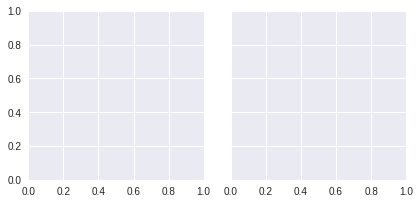

In [4]:
df = footballers[footballers['Position'].isin(['ST', 'GK'])]
g = sns.FacetGrid(df, col="Position")

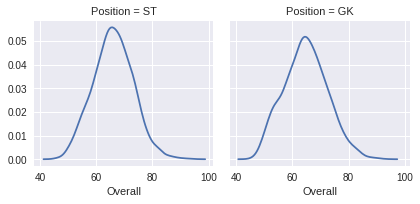

In [5]:
df = footballers[footballers['Position'].isin(['ST', 'GK'])]
g = sns.FacetGrid(df, col="Position")
g.map(sns.kdeplot, "Overall")

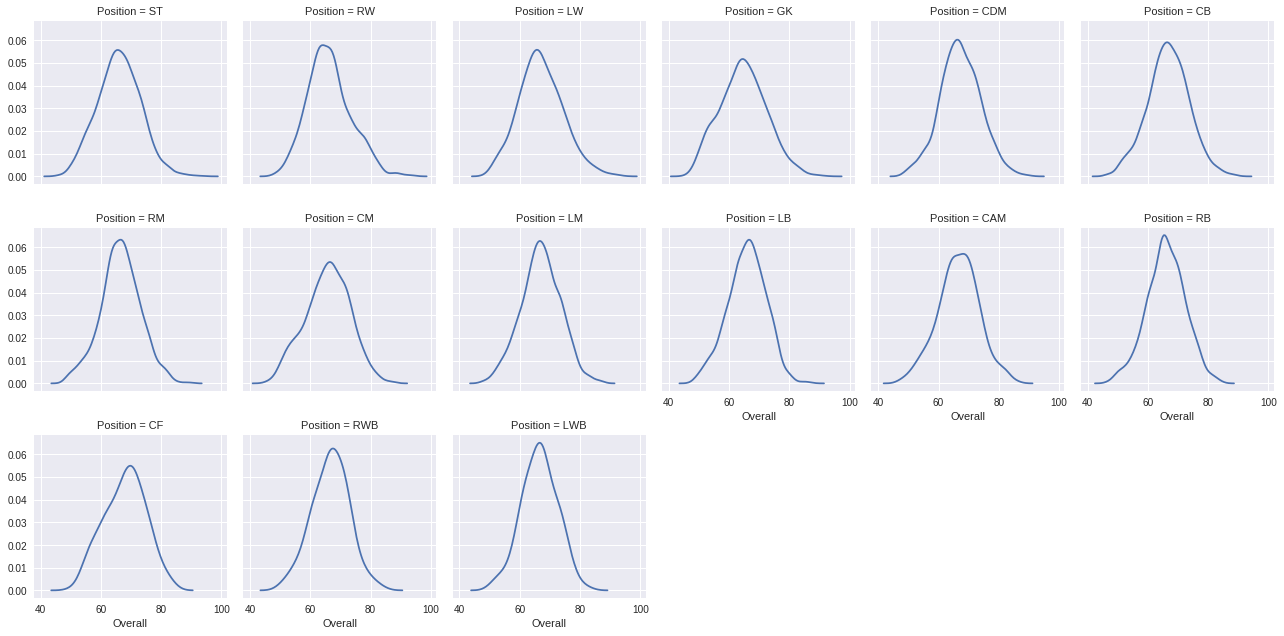

In [6]:
df = footballers

g = sns.FacetGrid(df, col="Position", col_wrap=6)
g.map(sns.kdeplot, "Overall")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


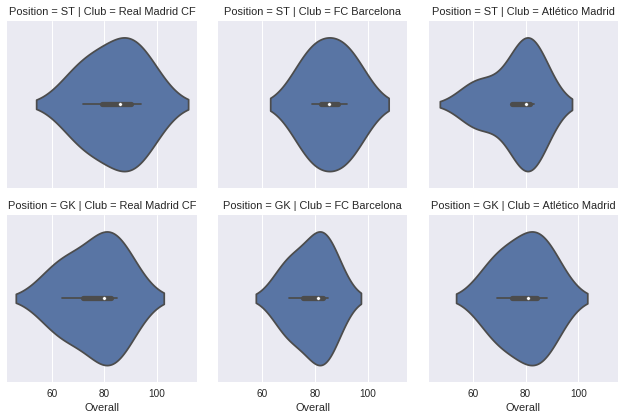

In [7]:
df = footballers[footballers['Position'].isin(['ST', 'GK'])]
df = df[df['Club'].isin(['Real Madrid CF', 'FC Barcelona', 'Atlético Madrid'])]

g = sns.FacetGrid(df, row="Position", col="Club")
g.map(sns.violinplot, "Overall")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


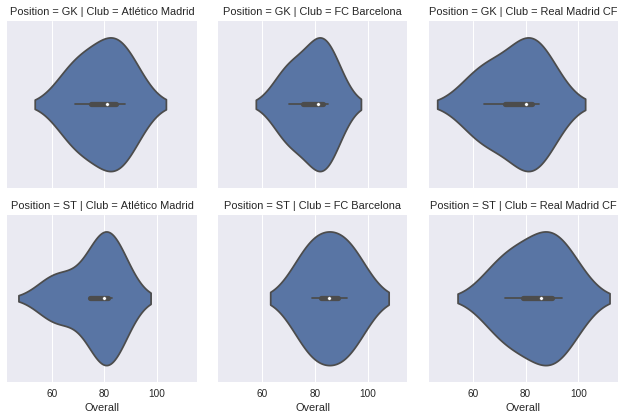

In [8]:
df = footballers[footballers['Position'].isin(['ST', 'GK'])]
df = df[df['Club'].isin(['Real Madrid CF', 'FC Barcelona', 'Atlético Madrid'])]

g = sns.FacetGrid(df, row="Position", col="Club", 
                  row_order=['GK', 'ST'],
                  col_order=['Atlético Madrid', 'FC Barcelona', 'Real Madrid CF'])
g.map(sns.violinplot, "Overall")

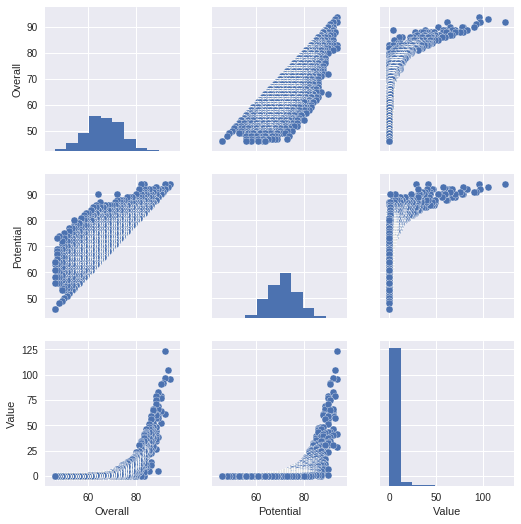

In [9]:
sns.pairplot(footballers[['Overall', 'Potential', 'Value']])